#Predicting NIH Research Funding for Emerging Health Issues

Harvard CS109 final project by Jonathan Campbell, Jordan Canedy and Sobha Sankaran

Submitted December 2015 

<img src="http://wrm5sysfkg-flywheel.netdna-ssl.com/wp-content/uploads/2013/02/Digital-Health-Funding-Tops-over-200-Million-in-First-Month-of-20131.jpg"/>

## Notebook Contents
[0 Introduction](#0)

[1 Data](#1)
  * [1.1 NIH Data](#1.1)
  
[2 Analysis](#2)
  * [2.1 Grant Funding](#2.1)
  * [2.2 Research Project Categories](#2.2)
  * [2.3 Project Categories as Funding Indicators](#2.3)
  
[3 Prediction](#3)
  * [3.1 Prediction Dataframe](#3.1)
  * [3.2 Linear Regression](#3.2)
  * [3.3 Ridge Regression ](#3.3)
  * [3.4 Lasso Regression ](#3.4)
  * [3.5 Comparing Predictions  ](#3.5)
 
  
[4 Conclusions](#4)
  * [4.1 Inference](#4.1)
  * [4.2 Next Steps](#4.2)

All Data used in this project can be accessed from our github repository :
https://github.com/CS109NIH/eHealth





#0 Introduction
<a id = '0'></a>
-----
##Project Overview and Related Work
We set out to develop a method to identify emerging health issues and predict grant funding for related research. With an application running this algorithm a grant applicant could predict the funding level for an emerging health issue category.  This method can equip applicants to gain a better understanding of the grant funding model enabling them to build a strong grant proposal and increase the likelihood of funding.  

As stated in their website, https://datascience.nih.gov/community, the data science community at NIH  works on harvesting the wealth of information contained in biomedical Big Data to advance understanding of human health and disease.  NIH launched the Big Data to Knowledge (BD2K) initiative in 2012 to enable biomedical research as a digital research enterprise, to facilitate discovery and support new knowledge, and to maximize community engagement. This community works on a number of similar challenges such as this project to discover patterns and connection using data that were previously hidden.  

##Background and Motivation

The National Institutes of Health (NIH), the nation’s medical research agency has paved the way for important discoveries that have improved health and saved lives for centuries.   Approximately 83% of NIH’s $30.3 billion FY 2015 budget goes to more than 300,000 research personnel at over 3,000 universities, medical schools, and other research institutions in every state and throughout the world to support research that turns discovery into health.  (Source: NIH.gov)

One of the challenges faced by NIH is ensuring adequate funding for research associated with emerging health issues.  As the specific work associated with emerging issues is inherently difficult to describe in detail at the time of application, applicants typically describe the process by which they plan to identify, prioritize and address newly arising concerns and respond to them.  This element of uncertainty detracts from NIH’s research priorities.  This problem calls for a more scientific approach to emerging health issues identification and research funding.  We propose a new data science program that identifies emerging health issues and predicts grant funding for related research.  

##Initial Questions
Our study began with one question: Can we predict emerging health issues? However, we quickly realized that our initial question was too broad and that we needed to rethink.  Not only was the initial question difficult to answer but also not very useful for grant applicants.  As the project continued, the questions evolved. Eventually, the following questions emerged to drive our analysis: 

•	What research topics are receiving increased attention in terms of grant funding? 

•	What do grant funding patterns look like and how that translates to emerging health issues?

•	Can we integrate these explanatory variables and funding patterns into a predictive algorithm that would predict level of funding for emerging health issues research?

##Overview Of Our Process
NIH grant funding depends on a number of factors such as project category, type of research, nature of the institute offering the funding etc.  We began our study by scraping relevant datasets from the NIH website. We then performed a series of exploratory analyses to understand how different variables were associated with one another. These explorations revealed important patterns about grant funding.  We also incorporated mapping and clustering operations into our exploratory phase to identify top categories indicative of emerging health issues.  

The information collected during the exploratory phase led to the creation of predictive algorithms using multiple regression.

In [1]:
#Prepare the notebook for matplotlib
%matplotlib inline

#import libraries
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#1 DATA
<a id = '1'></a>
-----

For this project, we explored publicly-available grant funding data from the NIH website.  The data sources are described in more detail in the following subsections. We chose to focus our analysis on funding data from 2008 through 2014. 

##1.1 NIH data
<a id = '1.1'></a>
-----

### 1.1.1 Grants

Project grant funding data by year starting from 2008 is available at http://exporter.nih.gov/.  We uploaded this data  under 'Data/NIH_Grants.csv'. Due to the size of this data, we are not able to upload it to our GitHub repository.  However, data can be accessed at this drop box link https://www.dropbox.com/s/3ueojaq1vjrzi4o/NIH_GRANTS.csv?dl=0  .

#### Data Cleanup 
As a first step, we chose to merge yearly grant data to one large dataset.  However, different files had different column headers and some manipulation was required to remove columns that were not available for all years.  Once unwanted columns were removed, we were able to create one rather big file (1.1GB).  We chose to trim down additional not so relevant columns before beginning our analysis.  Examples of removed columns include CORE_PROJECT_NUM, SERIAL_NUMBER, SUB_PROJECT_ID etc.

After we completed our clean up we were left with the following fields for each year:

**Application_ID**:  A unique identifier of the project record

**Activity**:  A 3-character code identifying the grant, contract, or intramural activity through which a project is supported. 

**Administering_IC**:  Administering Institute or Center code 

**Application_Type**:  A one-digit code to identify the type of application funded:

1 = New application

2 = Competing continuation (also, competing renewal)

3 = Application for additional (supplemental) support.  

4 = Competing extension for an R37 award or first non-competing year of a Fast Track SBIR/STTR award

5 = Non-competing continuation

7 = Change of grantee institution

9 = Change of NIH awarding Institute or Division (on a competing continuation)


**Award_Notice_Date**:  Award notice date or Notice of Grant Award (NGA) 

**CFDA_Code**:  Federal programs are assigned a number in the Catalog of Federal Domestic Assistance (CFDA)

**Funding_IC(s)**:  The NIH Institute or Center(s) providing funding for a project 

**FY**:  The fiscal year appropriation from which project funds were obligated.

**NIH_Spending_Cats**:  Congressionally-mandated reporting categories into which NIH projects are categorized.  

**Org_City**:  The city in which the business office of the grantee organization or contractor is located.  

**Org_Country**:  The country in which the business office of the grantee organization or contractor is located.  

**Org_Dept**:  The departmental affiliation of the contact principal investigator for a project

**Org_District**:  The congressional district in which the business office of the grantee organization or contractor is located.  

**Org_Name**:  The name of the educational institution, research organization, business, or government agency receiving funding 

**Org_State**:  The state in which the business office of the grantee organization or contractor is located

**Org_Zipcode**:  The zip code in which the business office of the grantee organization or contractor is located

**PHR**:  Submitted as part of a grant application, this statement articulates a project's potential to improve public health. 

**Project_Title**:  Title of the funded grant, contract, or intramural (sub)project

**Study_Section**:  A designator for the SME that reviewed the research grant application for scientific and technical merit

**Support_Year:**  The year of support for a project, as shown in the full project number

**Total_Cost**:   Total project funding from all NIH Institute and Centers for a given fiscal year. 


In [2]:
#import 2008 to 2014 Grants data to Grants dataframe
Grants=pd.read_csv("./Data/NIH_Grants.csv")
Grants.head()

C:\Users\karthigan\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,AWARD_NOTICE_DATE,CFDA_CODE,FUNDING_ICs,FY,NIH_SPENDING_CATS,ORG_CITY,ORG_COUNTRY,ORG_DEPT,ORG_DISTRICT,ORG_DUNS,ORG_FIPS,ORG_NAME,ORG_STATE,ORG_ZIPCODE,PHR,PROJECT_TITLE,STUDY_SECTION,SUPPORT_YEAR,TOTAL_COST
0,7406782,T32,AG,5,2008-03-17T00:00:00,866,NIA:1\,2008,Aging,PITTSBURGH,UNITED STATES,PUBLIC HEALTH &PREV MEDICINE,14,53785812,US,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,PA,15213,NaN,Training in the Epidemiology of Aging,ZAG1,19,1
1,7407518,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,HOUSTON,UNITED STATES,ANATOMY/CELL BIOLOGY,7,74615394,US,BAYLOR COLLEGE OF MEDICINE,TX,770303498,NaN,Cell and Molecular Biology of Aging,ZAG1,17,1
2,7388238,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,UNIVERSITY PARK,UNITED STATES,MISCELLANEOUS,5,NaN,US,PENNSYLVANIA STATE UNIVERSITY-UNIV PARK,PA,16802,NaN,TRAINING IN GENETICS OF COMPLEX BEHAVIORS IN A...,ZAG1,9,1
3,7410173,R21,AT,5,2008-03-11T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,DALLAS,UNITED STATES,NaN,30,96997515,US,BAYLOR RESEARCH INSTITUTE,TX,75204,NaN,Effect of S-adenosylmethionine on blood homocy...,ZAT1,3,1
4,7492627,R42,AT,5,2008-09-29T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,SAN DIEGO,UNITED STATES,NaN,52,145971367,US,"ARTYX PHARMACEUTICALS, INC.",CA,921231520,NaN,Safety of intraarticular N-acetylglucosamine,ZRG1,3,1


In [3]:
Grants.shape

(384565, 23)

In [4]:
Grants.columns

Index([u'APPLICATION_ID', u'ACTIVITY', u'ADMINISTERING_IC', u'APPLICATION_TYPE', u'AWARD_NOTICE_DATE', u'CFDA_CODE', u'FUNDING_ICs', u'FY', u'NIH_SPENDING_CATS', u'ORG_CITY', u'ORG_COUNTRY', u'ORG_DEPT', u'ORG_DISTRICT', u'ORG_DUNS', u'ORG_FIPS', u'ORG_NAME', u'ORG_STATE', u'ORG_ZIPCODE', u'PHR', u'PROJECT_TITLE', u'STUDY_SECTION', u'SUPPORT_YEAR', u'TOTAL_COST'], dtype='object')

In [5]:
Grants.dtypes

APPLICATION_ID         int64
ACTIVITY              object
ADMINISTERING_IC      object
APPLICATION_TYPE     float64
AWARD_NOTICE_DATE     object
CFDA_CODE            float64
FUNDING_ICs           object
FY                     int64
NIH_SPENDING_CATS     object
ORG_CITY              object
ORG_COUNTRY           object
ORG_DEPT              object
ORG_DISTRICT         float64
ORG_DUNS              object
ORG_FIPS              object
ORG_NAME              object
ORG_STATE             object
ORG_ZIPCODE           object
PHR                   object
PROJECT_TITLE         object
STUDY_SECTION         object
SUPPORT_YEAR         float64
TOTAL_COST             int64
dtype: object

In [6]:
#Look at unique number of records by columns
Grants.T.apply(lambda x: x.nunique(), axis=1)

APPLICATION_ID       384565
ACTIVITY                145
ADMINISTERING_IC         27
APPLICATION_TYPE          9
AWARD_NOTICE_DATE      2321
CFDA_CODE                42
FUNDING_ICs          283484
FY                        7
NIH_SPENDING_CATS    151010
ORG_CITY               1784
ORG_COUNTRY              76
ORG_DEPT                 51
ORG_DISTRICT             56
ORG_DUNS               7189
ORG_FIPS                 76
ORG_NAME               5860
ORG_STATE                62
ORG_ZIPCODE            6329
PHR                  132152
PROJECT_TITLE        138069
STUDY_SECTION           336
SUPPORT_YEAR             61
TOTAL_COST           225275
dtype: int64

In [7]:
#Since we merged yearly data sets, we need to understand if those data sets are of roughly equal size
Grants.groupby(['FY']).count()['APPLICATION_ID']

FY
2008    53274
2009    64186
2010    61279
2011    52332
2012    52532
2013    50651
2014    50311
Name: APPLICATION_ID, dtype: int64

##2 ANALYSIS
<a id = '2'></a>
-----

In this section of the notebook, we analyze project funding and health issues topic trends.  By exploring variables like project categories we gain insight into key predictors of grant funding. 

### 2.1 Grant Funding 
<a id = '2.1'></a>

As a general introduction to the NIH grant system it is useful look at the overall budget by fiscal year since 2008.  

In [8]:
Grantstouse=Grants.copy()

In [9]:
#Group data by year and get total budget for each year
Grantsbyyeardict={}
grantsgg = Grantstouse.groupby('FY')
Grantsbyyeardict={ 'GRANT_BUDGET':grantsgg['TOTAL_COST'].sum()}
Grantsbyyeardf=pd.DataFrame(Grantsbyyeardict) 
Grantsbyyeardf['year']=Grantsbyyeardf.index

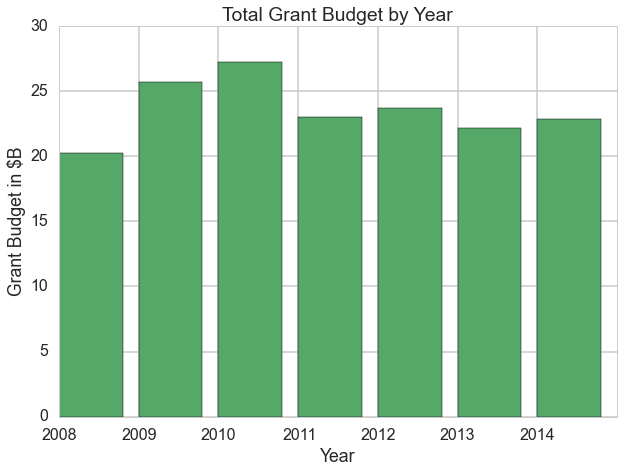

In [10]:
# Plot total grant budget by year
fig, ax1 = plt.subplots(figsize = (10,7))
years= ['2008','2009','2010','2011','2012','2013','2014']
plt.bar(Grantsbyyeardf['year'], Grantsbyyeardf['GRANT_BUDGET']/1000000000, color=sns.color_palette()[1], width=0.8)
plt.title('Total Grant Budget by Year')
plt.ylabel('Grant Budget in $B')
plt.xticks(Grantsbyyeardf['year'], years)
plt.xlabel('Year')

Based on the above graph, we can see that the total grant budget stays mostly within the 20 to 30 Billion dollar range.  Its unlikely that there would be a drastic change in the total grant budget in the coming years.

In [11]:
# Grant funding broken by application type
Grantsbyapptypedict={}
grantsappgg = Grantstouse.groupby(['FY','APPLICATION_TYPE'])
Grantsbyapptypedict={ 'GRANT_BUDGET':grantsappgg['TOTAL_COST'].sum()}
Grantsbyapptypedf=pd.DataFrame(Grantsbyapptypedict) 
Grantsbyapptypedf['APPLICATION_TYPE'] = Grantsbyapptypedf.index.get_level_values('APPLICATION_TYPE') 
Grantsbyapptypedf['YEAR'] = Grantsbyapptypedf.index.get_level_values('FY') 

In [12]:
Grantsbyapptypedf.pivot('APPLICATION_TYPE', 'YEAR', 'GRANT_BUDGET')

YEAR,2008,2009,2010,2011,2012,2013,2014
APPLICATION_TYPE,,,,,,,
1,5225885184,7838741860,7554177609,6330775372,6627674275,6251050277,7141818886
2,1381700626,1727266545,1566355085,1245220480,1355678641,1025775870,1428068662
3,322940288,1696684748,749028088,339193916,364402051,457814380,472754058
4,115574539,150424771,143890033,232097330,146933182,293442606,169398325
5,11146011755,11572130556,14286030509,12507639164,11946282517,11791346126,11583491234
6,1700910,31916953,1164376,650267,3342727,24375871,3271713
7,176010975,179458675,264107331,142229519,261271109,207259394,169539456
8,9170603,1615734,NaN,1045648,879155628,2773186,7499529
9,29897615,20013992,21689399,18360338,75322707,29989938,26601947


Based on the above table, we notice that a good portion of the grant funding is allocated towards non-competing continuations of projects. 

Additionally, we chose to  visualize grant funding by transforming it to log scale.

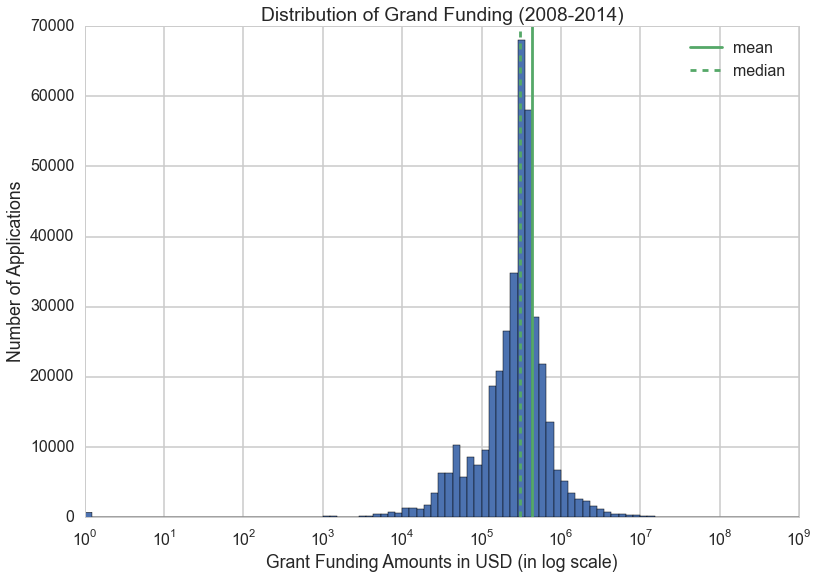

In [13]:
plt.hist(Grantstouse.TOTAL_COST, bins=np.logspace(0, 9,100))
plt.gca().set_xscale('log')
plt.xlabel('Grant Funding Amounts in USD (in log scale)')
plt.ylabel('Number of Applications')
plt.title('Distribution of Grand Funding (2008-2014)')
plt.axvline(Grantstouse.TOTAL_COST.mean(), color=sns.color_palette()[1], label='mean')
plt.axvline(Grantstouse.TOTAL_COST.median(), color=sns.color_palette()[1], linestyle='--', label='median')
plt.legend()

As seen above, the grant funding data follows a normal distribution when plotted on a log-linear scale. Above we can see that the mean is slightly lower than median for the data, because of the occurrence of very low values of funding (values around 1 dollar of funding). For the purposes of this analysis, this suggest we may want to remove applications which only recieved a 1 dollar of funding from our dataset.

### 2.2 Research Project Categories
<a id = '2.2'></a>
  

As a next step after exploring grant funding patterns, we focused our analysis on project categories.  

In [14]:
#Map Reduce Techniques to classify data by project categories
def mapper(row):
    appid = row[1]
    cats = row[9].split(';')
    return [(cat.strip(), appid) for cat in cats if cat != '' and cat != ' ']

def combiner(itemslist):
    indict={}
    for items in itemslist:
        for key, value in items:
            if not indict.has_key(key):
                indict[key]=[]
            indict[key].append(value)
    return indict.items()

def reducer(item):
    key, value = item
    return key, value

def map_reduce(tuples):
    mapped = map(mapper, tuples)
    combined = combiner(mapped)
    reduced = reduce(lambda x,y: x + [reducer(y)], combined, [])
    return reduced

tuples = Grants.itertuples()
reduced_cats = map_reduce(tuples)

In [15]:
#Create a dataframe of Categories and the associated Application Ids 
listmain = []
for cat, app_ids in reduced_cats:
    for app_id in app_ids:
        listmain.append((cat,app_id))
        
expandeddf = pd.DataFrame(listmain, columns=['Category','APPLICATION_ID'])  

#Reduced Dataframe for to merge Fiscal Year, can add other columns in future
reduced_df = Grants[['APPLICATION_ID','TOTAL_COST','FY']]

result = pd.merge(expandeddf, reduced_df, on='APPLICATION_ID')
tempdf = pd.DataFrame(result.groupby(['Category'])['APPLICATION_ID'].count())
tempdf = tempdf.reset_index()
tempdf = tempdf.rename(columns={'APPLICATION_ID': 'Count'})

# Sort the dataframe in desccending order to get the top categories
sorteddf = tempdf.sort('Count', ascending = False)

In [16]:
# Get counts of research topics by grant year
temp_fy_df = pd.DataFrame(result.groupby(['Category','FY'])['APPLICATION_ID'].count())    
temp_fy_df = temp_fy_df.reset_index()
temp_fy_df = temp_fy_df.rename(columns={'APPLICATION_ID': 'Count'})
  
temp_fy_df.head()

,Category,FY,Count
0,ALS,2008,110
1,ALS,2009,136
2,ALS,2010,157
3,ALS,2011,136
4,ALS,2012,136


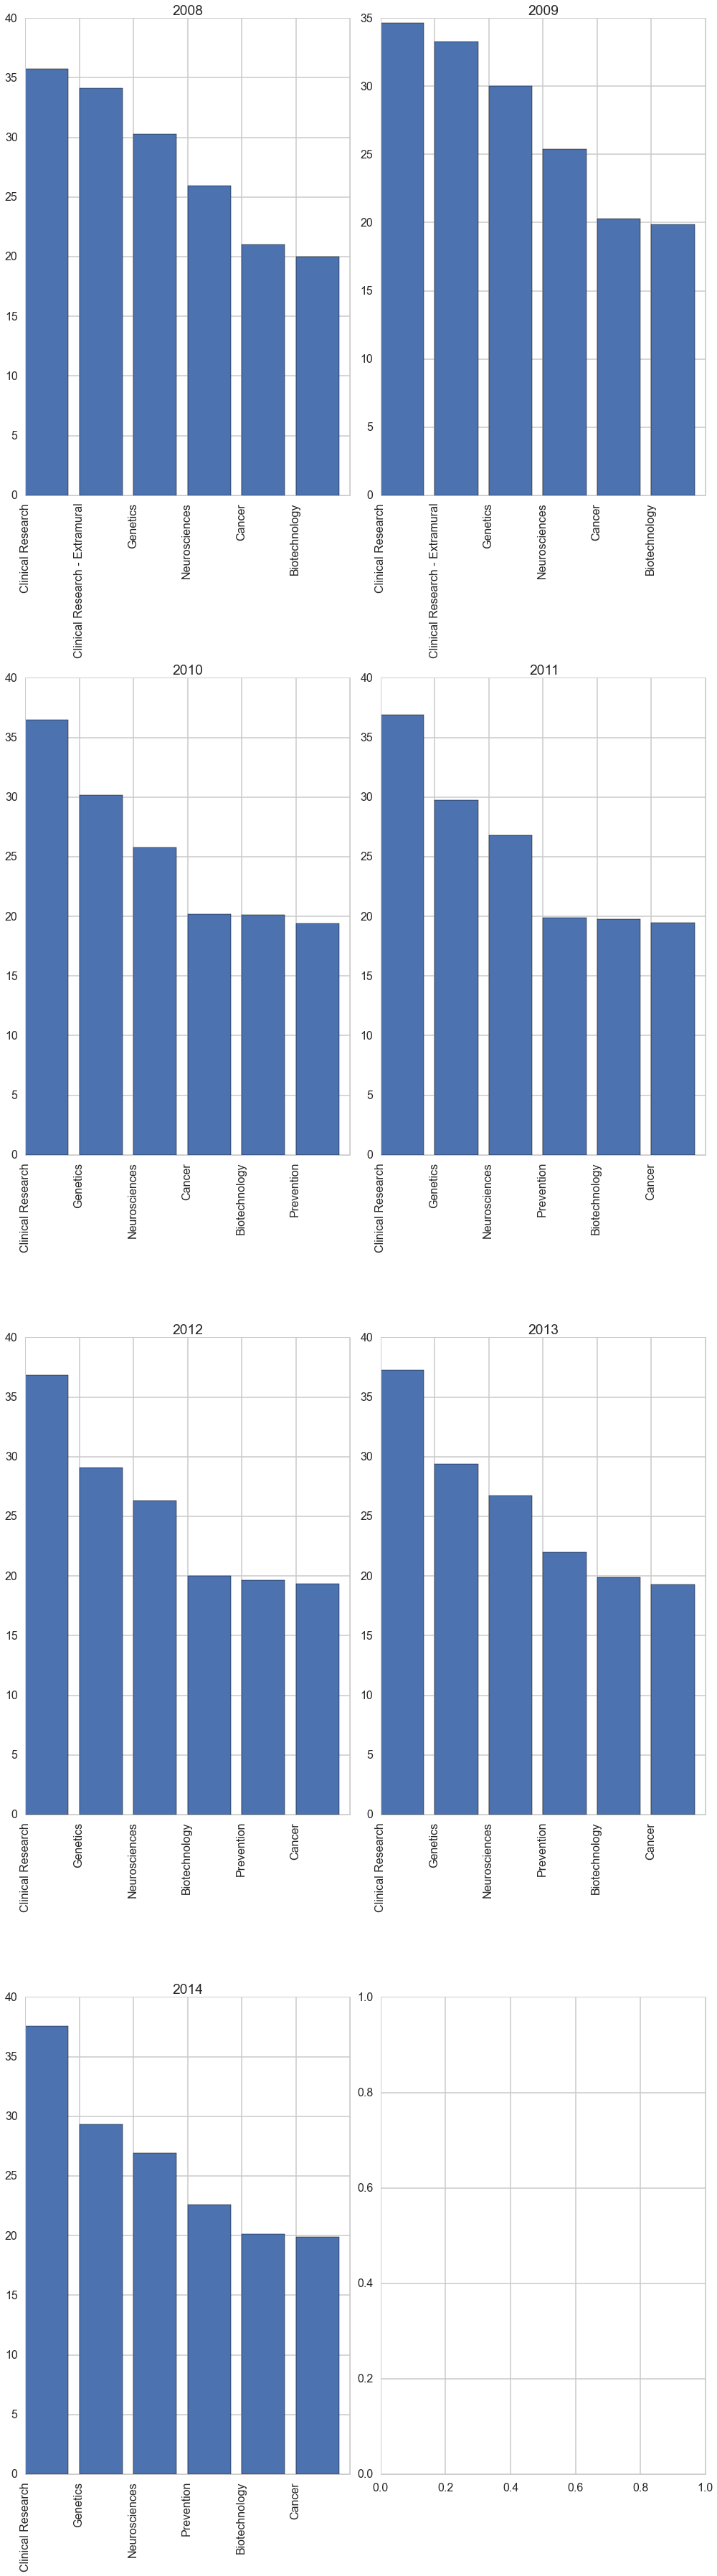

In [17]:
# Plot top categories for each year 
fys = range(2008,2015)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (14,50))

for ax, fy in zip(axes.ravel(), fys):
    sorted_fy_df = temp_fy_df[temp_fy_df['FY']==fy].sort('Count', ascending = False).head(6)    
    len(Grants[Grants['FY']==fy])
    sorted_fy_df['Percentage'] = sorted_fy_df.Count/len(Grants[Grants['FY']==fy])*100
            
    percentage =sorted_fy_df.Percentage.values              
    y_pos = np.arange(len(sorted_fy_df.Category.values))
    ax.bar(y_pos, percentage)
    ax.set_title(fy)
    ax.set_xticklabels(sorted_fy_df.Category.values, rotation = 'vertical')
fig.tight_layout()   



This visualization was an attempt to see if the top NIH_SPENDING_CATEGORIES changed year over year.  As evidenced by this graph, there was very little change between the years.  Although, the order changed slightly, the same 6 categories were in the top for each year.

This lead us down the path that the top terms year over year would be very good predictors for the next years terms.   In other words, we should expect to see the a similar pattern for future years. 



In [18]:
#Determine % of applications by categories
fys = range(2009,2015)

sorted_fy_df_int = temp_fy_df[temp_fy_df['FY']==2008].sort('Count', ascending = False)
sorted_fy_df_int['Percentage'] = sorted_fy_df_int.Count/len(Grants[Grants['FY']==2008])*100
    
for fy in  fys:
    sorted_fy_df = temp_fy_df[temp_fy_df['FY']==fy].sort('Count', ascending = False)  
    sorted_fy_df['Percentage'] = sorted_fy_df.Count/len(Grants[Grants['FY']==fy])*100    
    sorted_fy_df_int = pd.concat([sorted_fy_df_int,sorted_fy_df])
    
sorted_fy_df_int.head(2)   

,Category,FY,Count,Percentage
316,Clinical Research,2008,19037,35.734129
323,Clinical Research - Extramural,2008,18166,34.099185


In [19]:
# Display % change in number of applications for a specific category
PivotDF = pd.DataFrame(sorted_fy_df_int.pivot('Category', 'FY', 'Percentage'))
where_are_NaNs = np.isnan(PivotDF)
PivotDF[where_are_NaNs] = 0
PivotDF['2014-2008']= PivotDF[2014]-PivotDF[2008]
PivotDF.sort('2014-2008', ascending = False).head(10)

FY,2008,2009,2010,2011,2012,2013,2014,2014-2008
Category,,,,,,,,
Rare Diseases,0.000000,0.000000,0.000000,13.911182,14.195157,14.430120,14.621057,14.621057
HIV/AIDS,0.000000,0.000000,8.255683,8.190018,7.753369,7.697775,8.097633,8.097633
Prevention,16.161730,16.815193,19.401426,19.899870,19.654687,21.995617,22.603407,6.441677
Human Genome,3.607764,5.135076,5.563080,5.470840,5.760298,6.947543,7.407923,3.800159
Biodefense,0.000000,3.380800,3.730479,3.559963,3.592096,3.723520,3.621474,3.621474
Pediatric,11.136765,11.228305,12.886960,12.818161,13.823955,13.762808,14.525650,3.388886
Infectious Diseases,12.880580,13.054249,13.724114,13.454483,13.235742,16.060887,15.982588,3.102009
Dementia,0.000000,0.000000,0.000000,0.000000,0.000000,2.459971,2.460694,2.460694
Patient Safety,0.000000,0.000000,2.555525,2.306428,2.259575,2.335591,2.365288,2.365288


As seen above, new topics seem to have emerged over time.  The category that seems to have gained steady attention over time is Prevention, growing from 16.1% to 22.6%.   

In [20]:
PivotDF.sort('2014-2008').head(10)

FY,2008,2009,2010,2011,2012,2013,2014,2014-2008
Category,,,,,,,,
Clinical Research - Extramural,34.099185,33.272053,0.000000,0.000000,0.000000,0.000000,0.000000,-34.099185
Kidney and Urologic Diseases inc. Nephritis,4.750910,4.624061,0.000000,0.000000,0.000000,0.000000,0.000000,-4.750910
Translational Research,4.043248,14.567040,0.000000,0.000000,0.000000,0.000000,0.000000,-4.043248
Effectiveness Research,2.284416,2.352538,0.000000,0.000000,0.000000,0.000000,0.000000,-2.284416
Mind and Body,3.162894,2.553516,2.901483,2.786058,2.705018,1.101656,1.115064,-2.047829
Clinical Research - Intramural,1.610542,1.314928,0.000000,0.000000,0.000000,0.000000,0.000000,-1.610542
Mental Retardation (Intellectual and Developmental Disabilities (IDD)),1.563615,1.304023,1.514385,1.488573,1.435316,0.000000,0.000000,-1.563615
Kidney and Urologic - Prostate Disease,1.364643,1.316486,0.000000,0.000000,0.000000,0.000000,0.000000,-1.364643
Cancer,21.042159,20.305051,20.183097,19.492853,19.355821,19.310576,19.902208,-1.139951


The graph dataframe above represents terms NIH_SPENDING_CATEGORIES that have fallen out of favor in the last few years.  The major significant switch would be Clinical Research - Extramural no longer being funded post 2010.   

In [21]:
# Identify topics that are funded the most over time
SumFundingdf = pd.DataFrame(result.groupby(['Category'])['TOTAL_COST'].sum())
SumFundingdf = SumFundingdf.reset_index()
SumFundingdf = SumFundingdf.sort('TOTAL_COST', ascending = False)
SumFundingdf.head()

,Category,TOTAL_COST
58,Clinical Research,75188077611
109,Genetics,49409821838
231,Prevention,43776699933
38,Biotechnology,37497503263
199,Neurosciences,36541426018


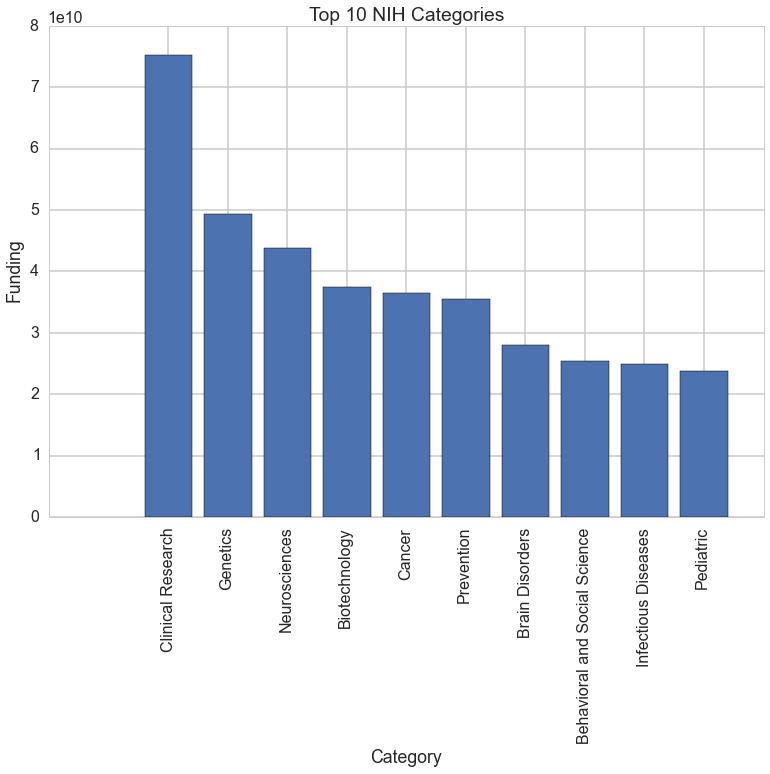

In [22]:
# Identify top 10 categories based on funding 
percentage =(SumFundingdf.head(10).TOTAL_COST.values)         
y_pos = np.arange(len(sorteddf.head(10).Category.values))
plt.bar(y_pos, percentage, align = 'center')
plt.xticks(y_pos, sorteddf.head(10).Category.values, rotation='vertical')
plt.ylabel('Funding')
plt.xlabel('Category')
plt.title('Top 10 NIH Categories')

The top 10 research categories that have been funded since 2008 are represented above.  

### 2.3 Project Categories as Funding Indicators
<a id = '2.3'></a>

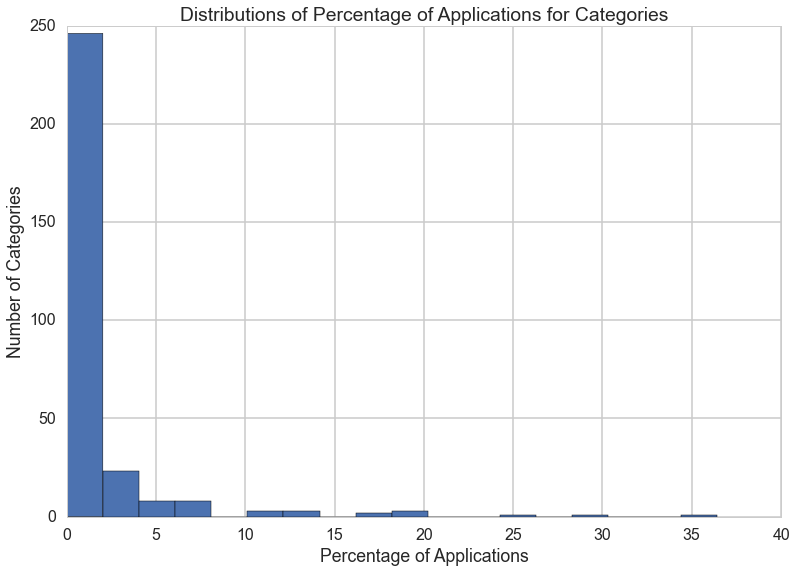

In [23]:
# Plot number of applications by project categories
plt.hist(sorteddf.Count.values/float(len(Grants)) * 100, bins=18)
plt.xlabel('Percentage of Applications')
plt.ylabel('Number of Categories')
plt.title('Distributions of Percentage of Applications for Categories')

In [24]:
#get categories that appear in 5% or more of the applications
interestingcats = sorteddf.Category[sorteddf.Count.values/float(len(Grants)) * 100 >= 5].values
len(interestingcats)

27

#### Construct Indicator Dataframe for Categories
We decided to work with categories that appear in 5% or more of the grant applications.  This yielded 27 categories.  We created dummy (indicator) variables for these categories and created an indicator dataset.   

In [25]:
#Build indicator variables 
Spendingcatdict = dict(reduced_cats)
appids_set = set(Grants.APPLICATION_ID)
SpendingcatIs = {}
for cat in interestingcats:
    catids = Spendingcatdict[cat]
    catids_set = set(catids)
    noncatids_set = appids_set - catids_set
    indicators = (zip(noncatids_set, np.zeros(len(noncatids_set))) + 
                  zip(catids_set, np.ones(len(catids_set))))
    indicators.sort(key=lambda t: t[0])
    SpendingcatIs[cat] = [x for (y,x) in indicators]

# Use application id as foreign key
SpendingcatIs['APPLICATION_ID'] = sorted(Grants.APPLICATION_ID.tolist())

In [26]:
catIdf = pd.DataFrame(SpendingcatIs)
catIdf.head()

,APPLICATION_ID,Aging,Basic Behavioral and Social Science,Behavioral and Social Science,Bioengineering,Biotechnology,Brain Disorders,Cancer,Cardiovascular,Clinical Research,Clinical Research - Extramural,Clinical Trials,Digestive Diseases,Emerging Infectious Diseases,Genetics,HIV/AIDS,Human Genome,Infectious Diseases,Lung,Mental Health,Neurodegenerative,Neurosciences,Nutrition,Pediatric,Prevention,Rare Diseases,Stem Cell Research,Substance Abuse
0,6465237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6826709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6920727,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,6950298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,6950464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#Export dataframe to CSV file for future analysis
catIdf.to_csv('./Data/NIH_Grants_Cats.csv')

### 2.3.1 Understanding How Categories May Perform in Regression


In [28]:
Grants.shape, catIdf.shape

((384565, 23), (384565, 28))

In [29]:
# Merge Grants dataframe with Categorical dataframe
mergedf = pd.merge(Grants, catIdf, how='left', on='APPLICATION_ID')
mergedf.head()

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,AWARD_NOTICE_DATE,CFDA_CODE,FUNDING_ICs,FY,NIH_SPENDING_CATS,ORG_CITY,ORG_COUNTRY,ORG_DEPT,ORG_DISTRICT,ORG_DUNS,ORG_FIPS,ORG_NAME,ORG_STATE,ORG_ZIPCODE,PHR,PROJECT_TITLE,STUDY_SECTION,SUPPORT_YEAR,TOTAL_COST,Aging,Basic Behavioral and Social Science,Behavioral and Social Science,Bioengineering,Biotechnology,Brain Disorders,Cancer,Cardiovascular,Clinical Research,Clinical Research - Extramural,Clinical Trials,Digestive Diseases,Emerging Infectious Diseases,Genetics,HIV/AIDS,Human Genome,Infectious Diseases,Lung,Mental Health,Neurodegenerative,Neurosciences,Nutrition,Pediatric,Prevention,Rare Diseases,Stem Cell Research,Substance Abuse
0,7406782,T32,AG,5,2008-03-17T00:00:00,866,NIA:1\,2008,Aging,PITTSBURGH,UNITED STATES,PUBLIC HEALTH &PREV MEDICINE,14,53785812,US,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,PA,15213,NaN,Training in the Epidemiology of Aging,ZAG1,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7407518,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,HOUSTON,UNITED STATES,ANATOMY/CELL BIOLOGY,7,74615394,US,BAYLOR COLLEGE OF MEDICINE,TX,770303498,NaN,Cell and Molecular Biology of Aging,ZAG1,17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7388238,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,UNIVERSITY PARK,UNITED STATES,MISCELLANEOUS,5,NaN,US,PENNSYLVANIA STATE UNIVERSITY-UNIV PARK,PA,16802,NaN,TRAINING IN GENETICS OF COMPLEX BEHAVIORS IN A...,ZAG1,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7410173,R21,AT,5,2008-03-11T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,DALLAS,UNITED STATES,NaN,30,96997515,US,BAYLOR RESEARCH INSTITUTE,TX,75204,NaN,Effect of S-adenosylmethionine on blood homocy...,ZAT1,3,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,7492627,R42,AT,5,2008-09-29T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,SAN DIEGO,UNITED STATES,NaN,52,145971367,US,"ARTYX PHARMACEUTICALS, INC.",CA,921231520,NaN,Safety of intraarticular N-acetylglucosamine,ZRG1,3,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


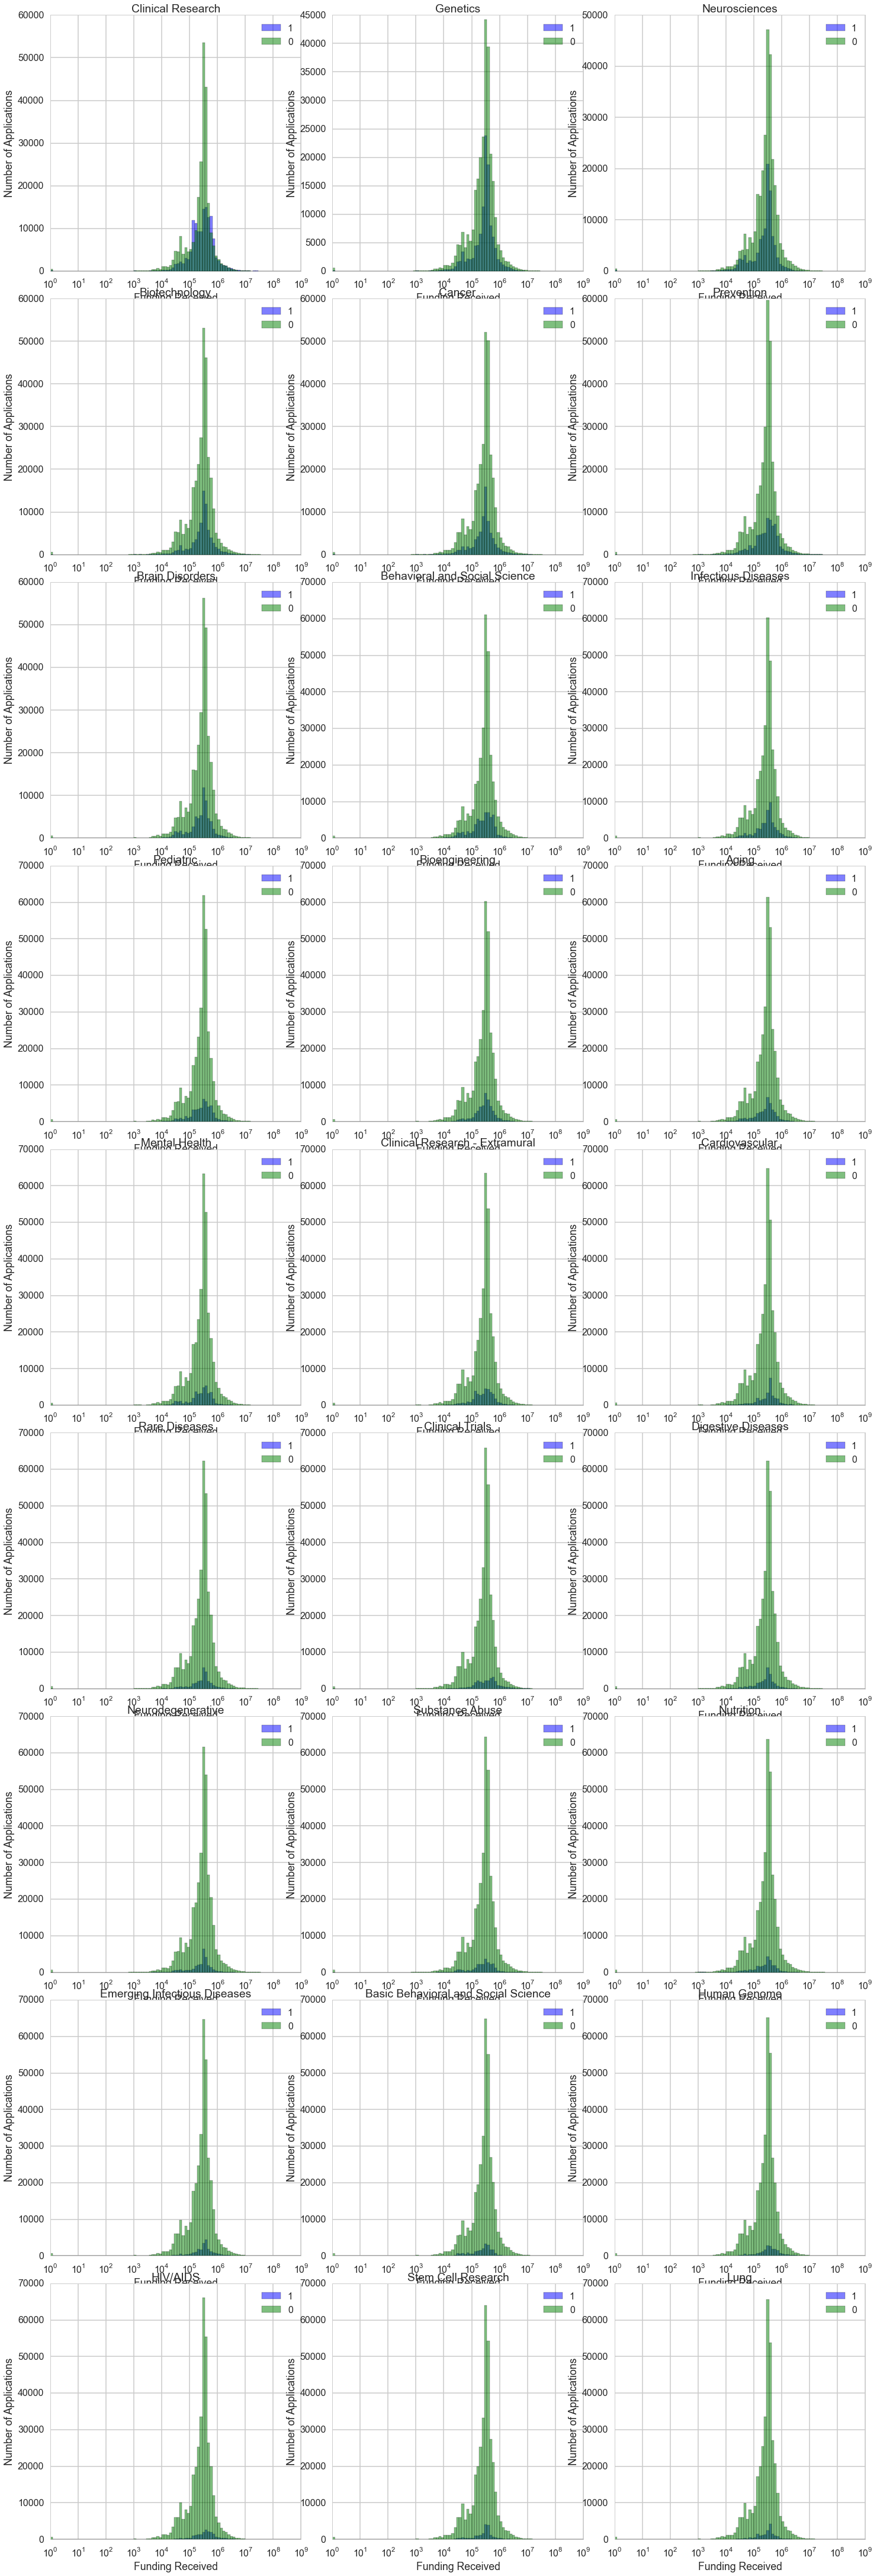

In [30]:
#Plot grant funding distribution for the top categories

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(20,60))
fig.tight_layout()

for i in range(len(interestingcats)):
    ax = axs[i / 3][i % 3]
    ax.set_title(interestingcats[i])
    ax.hist(mergedf.TOTAL_COST[mergedf[interestingcats[i]] == 1].tolist(), 
            bins=np.logspace(0, 9,100), facecolor='blue', alpha=0.5, label='1')
    ax.hist(mergedf.TOTAL_COST[mergedf[interestingcats[i]] == 0].tolist(), 
            bins=np.logspace(0, 9,100), facecolor='green', alpha=0.5, label='0')
    ax.set_xscale('log')
    ax.set_xlabel('Funding Received')
    ax.set_ylabel('Number of Applications')
    ax.legend()

In the above graph, the distributions of the indicators for the top 27 NIH spending categories are compared (1 (blue) if an application has the category and 0 (green) if an application does not have a category. From these graphs we can see that there is very little separation between the indicators (0 and 1) for all of the top 27 categories. This suggestions these categories may have a little effect on predicting the final overall funding amount. This should be noted when interpreting the results of regressions run with these indicators below.

### 2.3.2 Identifying other features as candidates for regression


In [31]:
#Looking at grant applications by number of terms
termsperapp = Grants.NIH_SPENDING_CATS.apply(lambda terms: len([cat.strip() for cat in terms.split(';') if cat != '' and cat != ' ']))
Grants['NUMBER_TERMS'] = termsperapp
GrantsPerNumTerm = Grants.groupby(['NUMBER_TERMS'])
avergecostpernumbterm = [ GrantsPerNumTerm.get_group(group).TOTAL_COST.sum() 
                         / float(len(GrantsPerNumTerm.get_group(group))) for group in GrantsPerNumTerm.groups]

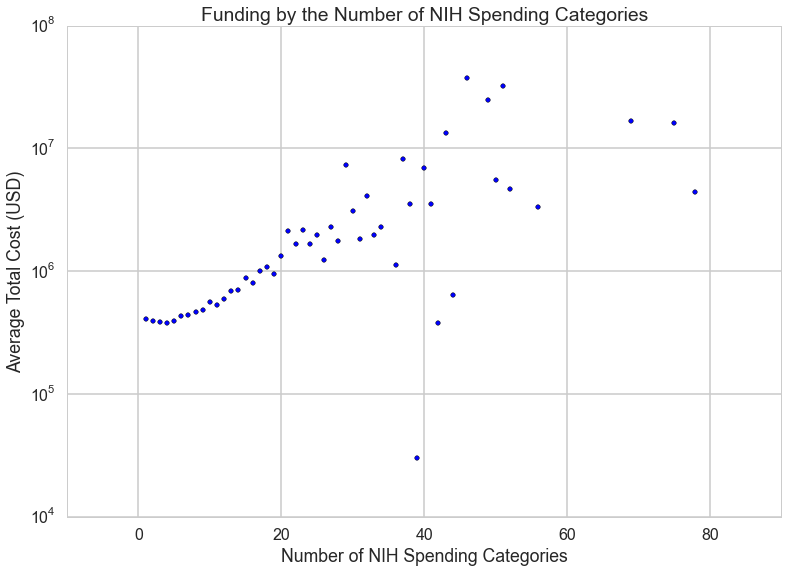

In [32]:
#plot funding by number of NIH categories
plt.scatter(GrantsPerNumTerm.groups.keys(), avergecostpernumbterm)
plt.gca().set_yscale('log')
plt.xlabel('Number of NIH Spending Categories')
plt.ylabel('Average Total Cost (USD)')
plt.title('Funding by the Number of NIH Spending Categories')

As seen in the above graph, grant funding increases linearly with the number of research categories associated with a grant application.

# 3 PREDICTION
<a id = '3'></a>
-----

In this section, we explored using regression models to predict grant funding.

## 3.1 Prediction Dataframe
<a id = '3.1'></a>
-----

### Training & Test Sets
We plan to use grant data from 2008 to 2013 as our training set and 2014 as our test data set.  To enable this, we added a column to the Grants dataframe called TestSet.  TestSet is 1 for FY=2014 and 0 for other years.

In [33]:
Grants['TestSet'] = Grants['FY']==2014

We added another column to the Grants database called NIH_COUNT which is the sum of the number of project categories associated with an application. 

In [34]:
Grants['NIH_COUNT'] = Grants['NIH_SPENDING_CATS'].apply(lambda x: x.count(';'))

In [35]:
%%time
#Adding additional columns
Grants['ACTIVITY_TRUNC'] = Grants['ACTIVITY'].apply(lambda x: x[:1])
Grants_AddedCol = Grants.copy()

Added_Columns = ['APPLICATION_ID','SUPPORT_YEAR','TOTAL_COST','FY', 'NIH_COUNT']
for act in pd.unique(Grants.ACTIVITY_TRUNC.ravel()):
    Grants_AddedCol['i_Act_'+act] = (Grants['ACTIVITY_TRUNC']==act).astype(int)
    Added_Columns.append('i_Act_'+act)
    
for app_type in pd.unique(Grants.APPLICATION_TYPE.ravel()):
    Grants_AddedCol['i_App_Type_'+str(app_type)] = (Grants['APPLICATION_TYPE']==app_type).astype(int)    
    Added_Columns.append('i_App_Type_'+str(app_type))
    
for admin in pd.unique(Grants.ADMINISTERING_IC.ravel()):
    Grants_AddedCol['i_admin_'+admin] = (Grants['ADMINISTERING_IC']==admin).astype(int)   
    Added_Columns.append('i_admin_'+admin)

Wall time: 9.33 s


In [36]:
Grants_AddedCol.head()  

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,AWARD_NOTICE_DATE,CFDA_CODE,FUNDING_ICs,FY,NIH_SPENDING_CATS,ORG_CITY,ORG_COUNTRY,ORG_DEPT,ORG_DISTRICT,ORG_DUNS,ORG_FIPS,ORG_NAME,ORG_STATE,ORG_ZIPCODE,PHR,PROJECT_TITLE,STUDY_SECTION,SUPPORT_YEAR,TOTAL_COST,NUMBER_TERMS,TestSet,NIH_COUNT,ACTIVITY_TRUNC,i_Act_T,i_Act_R,i_Act_U,i_Act_F,i_Act_K,i_Act_N,i_Act_Z,i_Act_Y,i_Act_D,i_Act_S,i_Act_P,i_Act_G,i_Act_C,i_App_Type_5.0,i_App_Type_2.0,i_App_Type_1.0,i_App_Type_nan,i_App_Type_3.0,i_App_Type_7.0,i_App_Type_4.0,i_App_Type_8.0,i_App_Type_9.0,i_App_Type_6.0,i_admin_AG,i_admin_AT,i_admin_MH,i_admin_AR,i_admin_GM,i_admin_MD,i_admin_NS,i_admin_AI,i_admin_DK,i_admin_HD,i_admin_CA,i_admin_DA,i_admin_HL,i_admin_DE,i_admin_RR,i_admin_EY,i_admin_DC,i_admin_HG,i_admin_LM,i_admin_NR,i_admin_TW,i_admin_ES,i_admin_AA,i_admin_EB,i_admin_OD,i_admin_WH,i_admin_TR
0,7406782,T32,AG,5,2008-03-17T00:00:00,866,NIA:1\,2008,Aging,PITTSBURGH,UNITED STATES,PUBLIC HEALTH &PREV MEDICINE,14,53785812,US,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,PA,15213,NaN,Training in the Epidemiology of Aging,ZAG1,19,1,1,False,0,T,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7407518,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,HOUSTON,UNITED STATES,ANATOMY/CELL BIOLOGY,7,74615394,US,BAYLOR COLLEGE OF MEDICINE,TX,770303498,NaN,Cell and Molecular Biology of Aging,ZAG1,17,1,1,False,0,T,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7388238,T32,AG,5,2008-03-28T00:00:00,866,NIA:1\,2008,Aging,UNIVERSITY PARK,UNITED STATES,MISCELLANEOUS,5,NaN,US,PENNSYLVANIA STATE UNIVERSITY-UNIV PARK,PA,16802,NaN,TRAINING IN GENETICS OF COMPLEX BEHAVIORS IN A...,ZAG1,9,1,1,False,0,T,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7410173,R21,AT,5,2008-03-11T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,DALLAS,UNITED STATES,NaN,30,96997515,US,BAYLOR RESEARCH INSTITUTE,TX,75204,NaN,Effect of S-adenosylmethionine on blood homocy...,ZAT1,3,1,7,False,6,R,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7492627,R42,AT,5,2008-09-29T00:00:00,213,NCCAM:1\,2008,Aging;Arthritis;Clinical Research;Clinical Res...,SAN DIEGO,UNITED STATES,NaN,52,145971367,US,"ARTYX PHARMACEUTICALS, INC.",CA,921231520,NaN,Safety of intraarticular N-acetylglucosamine,ZRG1,3,1,6,False,5,R,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#Creating the mask with the TestSet column data
mask = ~Grants['TestSet'].values

## 3.2 Linear Regression 
<a id = '3.2'></a>

We first ran regression on our basic Grants data set with Total_Cost as a continuous response/target variable

In [38]:
#Create regression dataframe and test and training sets

regressiondf = Grants_AddedCol[Added_Columns].copy()
XMatrixdf = regressiondf.copy()

#delete redundant columns
del XMatrixdf['APPLICATION_ID']
del XMatrixdf['TOTAL_COST']
del XMatrixdf['SUPPORT_YEAR']
del XMatrixdf['FY']

Xmatrix=XMatrixdf.values
Yresp=regressiondf['TOTAL_COST'].values



In [39]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [40]:
#Define the RMSE function
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

In [41]:
#run linear regression
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(Xmatrix_train,Yresp_train)
training_accuracy = clf.score(Xmatrix_train, Yresp_train)
test_accuracy = clf.score(Xmatrix_test, Yresp_test)
rmse = get_rmse(Yresp_test, clf.predict(Xmatrix_test))
print rmse

1701561.18843


The RMSE of the model proved to be quite high: 1.7M USD.  As a next step, we chose to categorize our output response variable and run linear regression on it.  We then created our **Target variable**: Total Cost Bin.  This is our new **response** or **y**.

In [42]:
# Define funding categories
def funding_bins(value):
    if value < 50000:
        return 1 # Low Funding 
    elif value < 100000:
        return 2 # Low to Medium Funding   
    elif value < 250000:
        return 3 # Medium Funding   
    elif value < 500000:
        return 4 # Medium to High Funding   
    elif value < 1000000:
        return 5 # High Funding 
    else:
        return 6 #Very High Funding 

In [43]:
# Create the new response variable
regressiondf['TOTAL_COST_BIN'] = regressiondf['TOTAL_COST'].apply(lambda x: funding_bins(x))
regressiondf.groupby(['TOTAL_COST_BIN']).count()['APPLICATION_ID']

TOTAL_COST_BIN
1     31376
2     26538
3     88781
4    168531
5     50130
6     19209
Name: APPLICATION_ID, dtype: int64

Starting at 50k, the bins double in value, except from 100 to 250k it increased to 2.5  This was done since 250k, 500k, and 1 million as easy to interpret mentally.  

In [44]:
#Redefine the Y variable for the regression
Yresp=regressiondf['TOTAL_COST_BIN'].values
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [45]:
# Run regression for the categorical response
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(Xmatrix_train,Yresp_train)
rmse = get_rmse(Yresp_test, clf.predict(Xmatrix_test))
print rmse

0.901081338038


### Baseline Prediction

We chose to treat this model as our baseline prediction.

In [46]:
predictions={}
predictions['baseline'] = clf.predict(Xmatrix_test)

## 3.3 Ridge Regression 
<a id = '3.3'></a>

We then opted for ridge regression to improve our standard linear regression.   Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients.  

In [47]:
%%time

vdict = {}
rdict = {}
alpha_list = [0.01,0.1,10,100,1000]
for a in alpha_list: 
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(Xmatrix_train,Yresp_train)
    p = ridge.predict(Xmatrix_test)
    rsme = get_rmse(Yresp_test, p)        
    vdict[a] = rsme
    rdict[a] = ridge

Wall time: 3.64 s


In [48]:
minerroralpha=min(vdict, key=vdict.get)
regr=rdict[minerroralpha]
vdict

{0.01: 0.90095252390150848,
 0.1: 0.90095207708166869,
 10: 0.90090616436537618,
 100: 0.90067062012630517,
 1000: 0.90246019108029807}

In [49]:
# Add the ridge prediction model to the predictions dictionary
predictions['ridge'] = regr.predict(Xmatrix_test)

## 3.4 Lasso Regression 
<a id = '3.4'></a>

Our next regression technique was Lasso.   

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

Since our data has a significant number of columns it is believed that Lasso regression would improve our model even further.  

In [50]:
%%time

lasso_rmse_dict = {}
lasso_dict = {}
alpha_list = [0.00001, 0.0001, 0.001,0.01,0.1,10,100,1000]
for a in alpha_list: 
    Lasso = linear_model.Lasso(alpha=a)
    Lasso.fit(Xmatrix_train,Yresp_train)
    p = Lasso.predict(Xmatrix_test)
    rsme = get_rmse(Yresp_test, p)        
    lasso_rmse_dict[a] = rsme
    lasso_dict[a] = Lasso

Wall time: 3min 21s


C:\Users\karthigan\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [51]:
minerroralpha=min(lasso_rmse_dict, key=lasso_rmse_dict.get)
regr=lasso_dict[minerroralpha]
lasso_rmse_dict

{1e-05: 0.90093138317191046,
 0.0001: 0.90076720874753591,
 0.001: 0.90162357932106951,
 0.01: 0.92335115563964987,
 0.1: 1.1513919384853644,
 10: 1.2073874935114746,
 100: 1.2073874935114746,
 1000: 1.2073874935114746}

Initial attempts in the Lasso regression did not yield ideal good results, as evident by the dicitionary above.  The alpha Range was from 0.01 to 1000.  Decreasing the alpha range to 0.00001 resulted in a significant improvement to the RMSE.

In [52]:
predictions['lasso'] = regr.predict(Xmatrix_test)

## 3.5 Comparing Predictions 
<a id = '3.5'></a>


In [53]:
#Kept the same  as Homework 4,  only changed some of the labels.  
def compare_results(stars_actual, stars_predicted, ylow=1, yhigh=6, model="", predicteds=False, onsame=False, axis=False):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    if onsame:
        ax=onsame
    elif axis:
        ax=axis
    else:
        fig=plt.figure()
        ax=plt.gca()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    xp=[]
    yp=[]
    for k,v in df.groupby('actual'):
        xp.append(k)
        yp.append(v.predicted.mean())        
    
    cl, = ax.plot(xp,yp, 's-', label="means for %s" % model)
    c=cl.get_color()

    sig=df.groupby('actual').predicted.std().values
    ax.fill_between(xp, yp - sig, yp + sig, 
                 color=c, alpha=0.2)
    if predicteds:
        ax.plot(df.actual, df.predicted, '.', color=c, alpha=0.1, label="predicted for %s" % model)

    if not onsame:
        ax.plot([1,6],[1,6], 'k', label="slope 1")
        ax.set_xlabel("actual")
        ax.set_ylabel("predicted")
        ax.set_ylim([ylow,yhigh])
        ax.set_xlim([0.9, 6.1])
        ax.set_xticklabels([0,'x < 50k','50k <= x < 100k','100k <= x < 250k','250k <= x < 500k','500k <= x < 1,000k','1,000k <= x'])
        ax.set_yticklabels(['x < 50k','50k <= x < 100k','100k <= x < 250k','250k <= x < 500k','500k <= x < 1,000k','1,000k <= x'])
    ax.legend(frameon=False, loc="upper left")
    rmse=get_rmse(stars_actual, stars_predicted)
    print "RMSE for %s" % model, rmse
    return ax,rmse

RMSE for baseline 0.901081338038


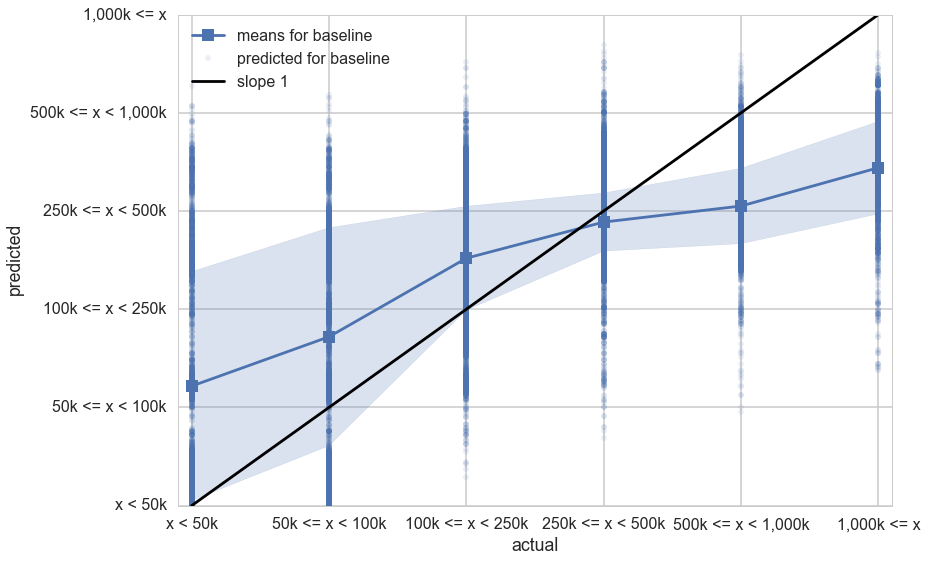

In [54]:
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['baseline'], model="baseline", predicteds=True);

Using slightly modified homework 4 code (compare_results), we were able to display our results graphically.   The black line represents ideal results, the square boxes represent means, the dots represent the points, and the shaded areas represent the standard deviation.   Interestingly, the standard deviation was lowest for the 250k to 500k funding bin.   It is to be noted that the bulk of the funded applications lie outside of this funding range.  We can also see that the standard deviation for the funding bin '< 50K' is much larger than that for the >='1 M'. The graph demonstrates that the model ended to favor more funding over less funding based upon the indicators. 

RMSE for ridge 0.900670620126
RMSE for baseline 0.901081338038


(<matplotlib.axes._subplots.AxesSubplot at 0x75cfbb38>, 0.90108133803771706)

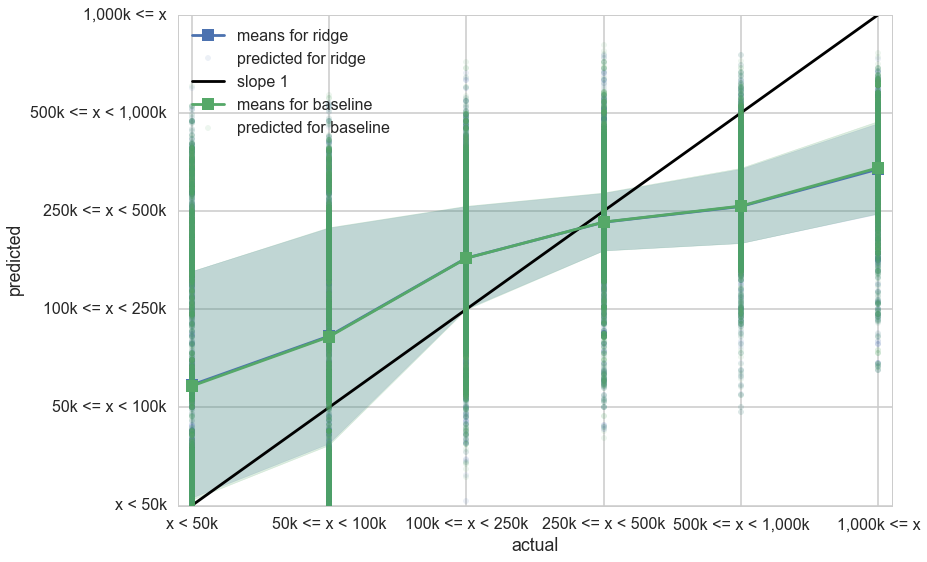

In [55]:
ax, rsme = compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['ridge'], model="ridge", predicteds=True);
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values, predictions['baseline'], model="baseline", predicteds=True, onsame = ax)

Very little change from the graph above, no noticable change from the baseline.  The RMSE for ridge barely improved.    

RMSE for ridge 0.900670620126
RMSE for lasso 0.900767208748


(<matplotlib.axes._subplots.AxesSubplot at 0x7c7b6b00>, 0.90076720874753591)

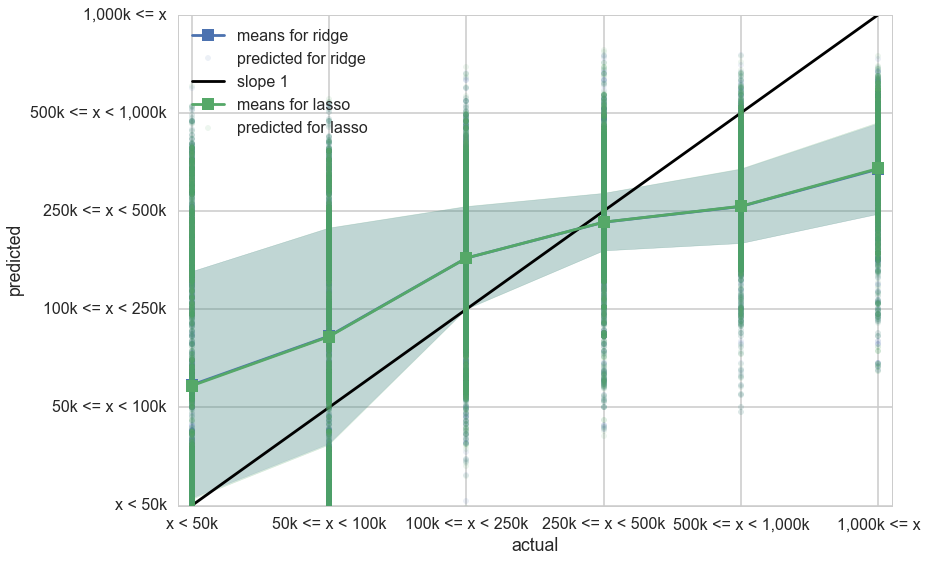

In [56]:
ax, rsme = compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['ridge'], model="ridge", predicteds=True);
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values, predictions['lasso'], model="lasso", predicteds=True, onsame = ax)

Lasso on the other hand appears to be doing slightly worse than the Ridge regression.   Specifically the model starts to underperform when predicting buckets that receive over 500k in funding.

RMSE for baseline 0.901081338038
RMSE for ridge 0.900670620126
RMSE for lasso 0.900767208748


(<matplotlib.axes._subplots.AxesSubplot at 0x8a695780>, 0.90076720874753591)

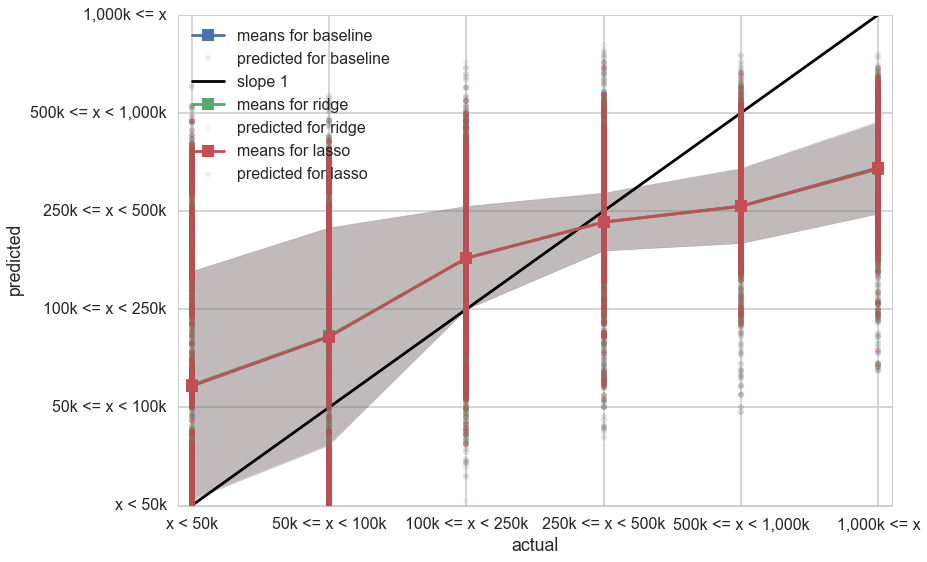

In [68]:
# Comparing all three models
ax, rsme = compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['baseline'], model="baseline", predicteds=True);
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['ridge'], model="ridge", predicteds=True, onsame = ax)
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values, predictions['lasso'], model="lasso", predicteds=True, onsame = ax)

### Regression with NIH_SPENDING_CATS as Indicators 

Our regression on the base data set with limit transformations can do a somewhat decent job predicting which funding bucket the application might fall in given the variables.   However, we believe we might be able to improve this by adding additional indicator variables based upon popular NIH_SPENDING_CATS.  

We will do the same as above, but instead add the 27 categorical variables from the NIH_SPENDING_CATS data frame created earlier called catIDF.
We will rerun, regression, ridge, and lasso and see how did in comparison to our first run.  

In [57]:
#Regression on merged dataset
regressiondf_nih = pd.merge(catIdf, Grants_AddedCol[Added_Columns].copy(),  on='APPLICATION_ID')
regressiondf_nih = pd.merge(Grants_AddedCol[Added_Columns].copy(), catIdf, on='APPLICATION_ID')
XMatrixdf = regressiondf_nih.copy()

del XMatrixdf['APPLICATION_ID']
del XMatrixdf['TOTAL_COST']
del XMatrixdf['SUPPORT_YEAR']
del XMatrixdf['FY']

regressiondf_nih['TOTAL_COST_BIN'] = regressiondf_nih['TOTAL_COST'].apply(lambda x: funding_bins(x))

Xmatrix=XMatrixdf.values
Yresp=regressiondf_nih['TOTAL_COST_BIN'].values

In [58]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [59]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(Xmatrix_train,Yresp_train)
training_accuracy = clf.score(Xmatrix_train, Yresp_train)
test_accuracy = clf.score(Xmatrix_test, Yresp_test)
rmse = get_rmse(Yresp_test, clf.predict(Xmatrix_test))

predictions['nih'] = clf.predict(Xmatrix_test)

In [60]:
%%time

vdict = {}
rdict = {}
alpha_list = [0.01,0.1,10,100,1000]
for a in alpha_list: 
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(Xmatrix_train,Yresp_train)
    p = ridge.predict(Xmatrix_test)
    rsme = get_rmse(Yresp_test, p)        
    vdict[a] = rsme
    rdict[a] = ridge

Wall time: 3.06 s


In [61]:
minerroralpha=min(vdict, key=vdict.get)
regr=rdict[minerroralpha]
predictions['ridge-nih'] = regr.predict(Xmatrix_test)

In [62]:
%%time

lasso_rmse_dict = {}
lasso_dict = {}
alpha_list = [0.00001, 0.0001, 0.001,0.01,0.1,10,100,1000]
for a in alpha_list: 
    Lasso = linear_model.Lasso(alpha=a)
    Lasso.fit(Xmatrix_train,Yresp_train)
    p = Lasso.predict(Xmatrix_test)
    rsme = get_rmse(Yresp_test, p)        
    lasso_rmse_dict[a] = rsme
    lasso_dict[a] = Lasso

Wall time: 5min 14s


In [63]:
minerroralpha=min(lasso_rmse_dict, key=lasso_rmse_dict.get)
regr=lasso_dict[minerroralpha]
lasso_rmse_dict
predictions['lasso-nih'] = regr.predict(Xmatrix_test)

RMSE for nih 0.895653362145
RMSE for ridge-nih 0.89531604146
RMSE for lasso-nih 0.895351127795


(<matplotlib.axes._subplots.AxesSubplot at 0x84f55f98>, 0.89535112779483139)

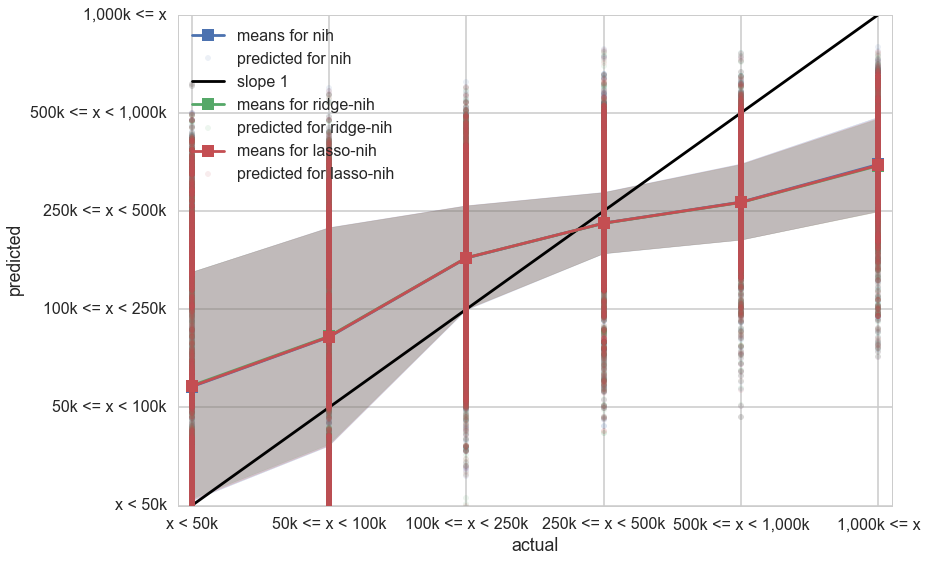

In [64]:
ax, rsme = compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values,predictions['nih'], model="nih", predicteds=True);
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values, predictions['ridge-nih'], model="ridge-nih", predicteds=True, onsame = ax)
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values, predictions['lasso-nih'], model="lasso-nih", predicteds=True, onsame = ax)

## Comparing Predictions

After adding the 27 indicator variables based upon categories the model improved slightly as evidence by a lower RMSE.   However as earlier, ridge regression was just slightly better than lasso, and not much better than NIH.   The decrease in the RMSE adds to the idea that the spending categories are important when determining funding for an application.    

RMSE for ridge 0.900670620126
RMSE for ridge-nih 0.89531604146


(<matplotlib.axes._subplots.AxesSubplot at 0x85059f98>, 0.89531604145976507)

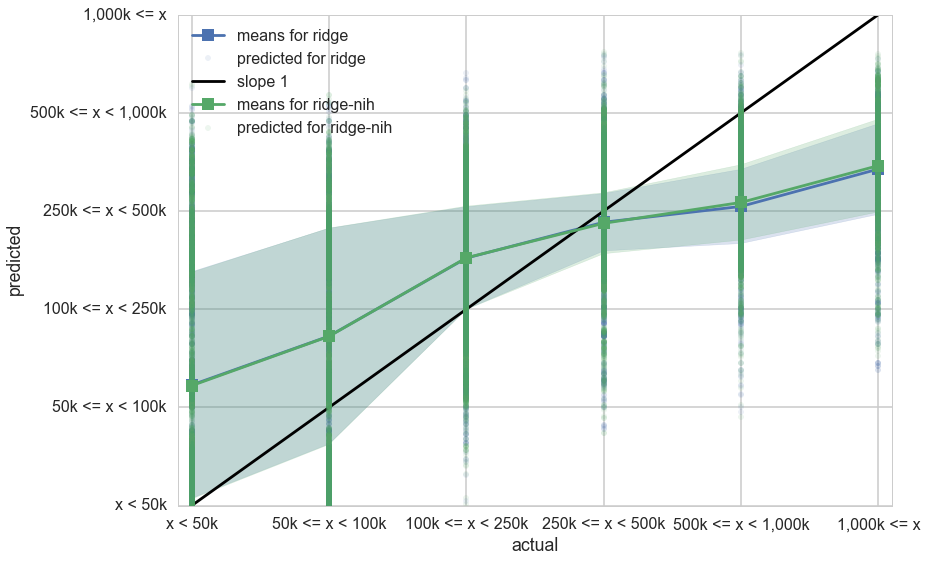

In [65]:
ax, rsme = compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['ridge'], model="ridge", predicteds=True);
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values, predictions['ridge-nih'], model="ridge-nih", predicteds=True, onsame = ax)

Now we can compare between our initial regression model without adding NIH_SPENDING_CATEGORIES as indicator variables and adding them in.   By looking at the 2 best models, ridge-nih and ridge, we notice they are very similar.  The RMSE is better for our improved models with categories.   The graph demonstrats that our means for ridge-nih in the upper 2 bucket (500k <=, and 1,000k<=) increased slightly over our original model.  Furthermore we can notice that in x < 50k bucket the means for ridge-nih decrease slightly.   By adding our nih_spending_Cats as indicator variables, our ability to forecast the upper and lower buckets improved.  

RMSE for ridge 0.900670620126
RMSE for baseline 0.901081338038
RMSE for lasso 0.900767208748
RMSE for nih 0.895653362145
RMSE for ridge-nih 0.89531604146
RMSE for lasso-nih 0.895351127795


(<matplotlib.axes._subplots.AxesSubplot at 0x70948e10>, 0.89535112779483139)

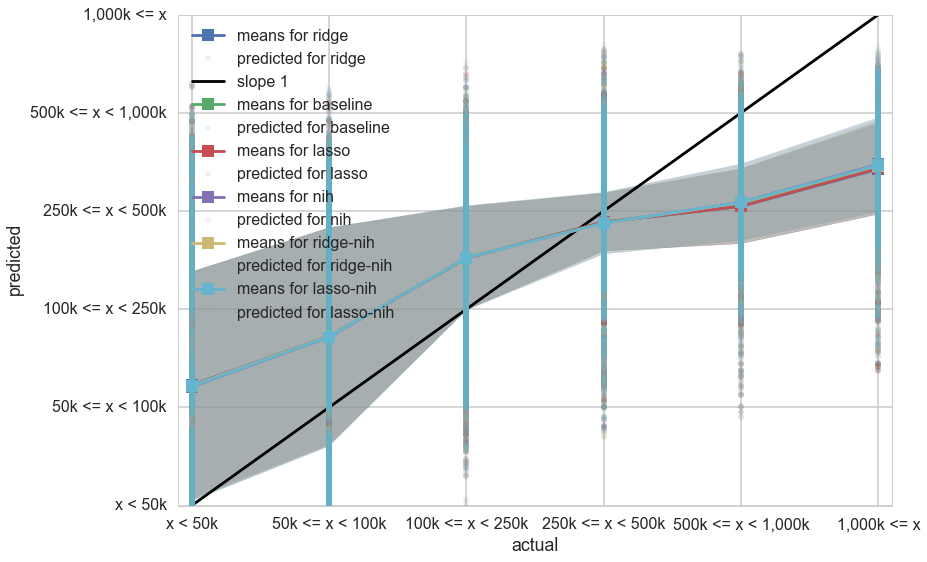

In [66]:
#Plotting and comparing results of all of the regressions
ax, rsme = compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values,predictions['ridge'], model="ridge", predicteds=True);
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values, predictions['baseline'], model="baseline", predicteds=True, onsame = ax)
compare_results(regressiondf[~mask]['TOTAL_COST_BIN'].values, predictions['lasso'], model="lasso", predicteds=True, onsame = ax)
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values,predictions['nih'], model="nih", predicteds=True, onsame = ax)
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values, predictions['ridge-nih'], model="ridge-nih", predicteds=True, onsame = ax)
compare_results(regressiondf_nih[~mask]['TOTAL_COST_BIN'].values, predictions['lasso-nih'], model="lasso-nih", predicteds=True, onsame = ax)

Another way to compare how our predictions performed would be to bucket the groups of predictions vs actuals.  While this could be misleading if our RMSE was high, but I think it will showcase the improvement of adding our indicator variables.   

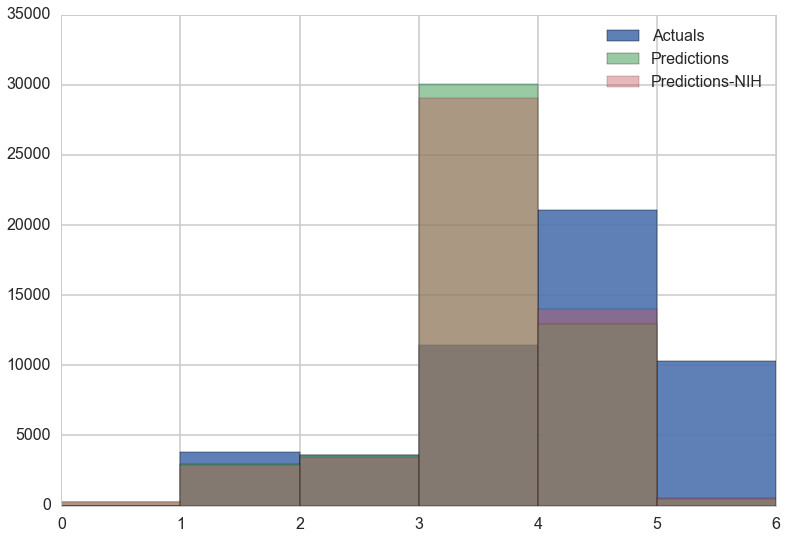

In [67]:
plt.hist(regressiondf[~mask]['TOTAL_COST_BIN'].values, bins=[0,1,2,3,4,5,6], alpha = 0.9, label = 'Actuals')
plt.hist(predictions['ridge'], bins=[0,1,2,3,4,5,6], alpha = 0.6, label='Predictions')
plt.hist(predictions['ridge-nih'], bins=[0,1,2,3,4,5,6], alpha = 0.4, label='Predictions-NIH')
plt.legend()

The histrogram above represents the predictions vs actuals 
* 0-1  :  'x < 50k'
* 1-2  :  '50k <= x < 100k'
* 2-3  :  '100k <= x < 250k'
* 3-4  :  '250k <= x < 500k'
* 4-5  :  '500k <= x < 1,000k'
* 5-6  :  '1,000k <= x'

This graph demonstrates that the predictions leaned heavily towards predicting within the 3-4 range while foregoing to predict the upper ranges effectively.   Primarily as anticipated our ability to predicit in the upper 2 buckets improved by looking at the last 2 bars in the histogram.  Predictions NIH was lower for 3-4, and higher for 4-5, and 4-6.   These distributions should shed light on why the RMSE decreased.   

##4. Conclusions
<a id = '4'></a>

We sought to predict grant funding for emerging health issues (research categories) through this project.  We used the following regression methods for that:

*Baseline: Linear regression with categorical response

*Ridge Regression

*Lasso Regression 

The above regressions were done both on the basic data set and the merged data set with emerging research categorical indicators.

##4.1 Inference
<a id = '4.1'></a>

After exploring different combinations of variables and regression models, we observed that the ridge regression model on the merged data set yields the lowest RMSE.  The ridge regression performed better than the baseline linear regression and the lasso regression models.  

We used RMSE as the performance indicator to compare our models because it's good at measuring the difference between values predicted by a model and the values actually observed.  The RMSE punishes large errors or in our case predicting a <=1000k funding bucket when it was actually < 50k.  

### Understanding the Results

After our results of adding additional NIH_SPENDING_CATS as indicators did not improve predictions we wanted to understand what possibly caused this issue.   We thought back to our exploratory data analysis and realized that early on we added the count of NIH Spending Categories for application as a column.   The theme of our project was based on the idea that this was going to be an important variable.    In an attempt to understand the importance, we re-ran the ridge regression without NIH_COUNT as a column.  The result is shown below:

![alt text](Images/graph_no_nih_count.png)

The ridge regression with no NIH spending category count performed significantly worse than the ridge regression with it.  This confirmed our suspicion and helped us understand the importance of this variable in our model.  

It is clear that the individual NIH Spending Categories did not improve the model when adding them as an indicator. However, the amount of different NIH spending categories an application was listed on, was an extremely valuable in determining the amount of funding for a project.

## 4.2 Next Steps
<a id = '4.2'></a>

Given our understanding of the grant funding patterns and emerging research categories gained through our explatory data analysis as next steps we would look to improve our model by using additional data elements.  It may be worthwhile to mine the abstract and publications also available at the NIH website for research categories and use them as explanatory variables in our models.  

This method, with enough improvement, can be used as the foundation to develop an online web application that could predict the level of grant funding based on research topic.  This can benefit the grant applicants immensely as they prepare their grant proposals.  Additionally this application can predict research trends using funding as one of its features.  